# **Project 1**, MIE1626 Fall 2024
**Data Science Methods and Statistical Learning [120 Marks]**

**Deadline: 2024-Oct-11 @ 21:00**

**Academic Integrity**

This is an individual project. Do not share your code with others, or post any parts of your work online. You can only submit code that is produced by you. If you use any online resource for developing parts of your code, you must explicitly acknowledge the source in a comment in your code. Students suspected of plagiarism on the project will be referred to the university for formal discipline according to the regulations.

**Please note that late submissions receive a penalty (or a mark of 0) as per syllabus.**

Please fill out the following:

• Full Name: Mengyang Liu


• Student Number: 1006702739


• UTorID: liumen78



**Three submission files are required:**

For submitting this project, three files must be submitted on Quercus by the project deadline:

1) The complete Jupyter file (in .ipynb format) (that completely compiles on Google colab without any errors regardless of the computer used.)

2) A self-contained and complete HTML printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

3) Appendix pdf file of all prompts and all responses for all interactions you have had regarding this project with any AI assistant tool (Chat GPT etc.). If you do not use any AI assistant tool at all, this appendix pdf file is not needed.

### How to obtain an **HTML** file from an **IPYNB** file

1. Download the IPYNB file of your complete project: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of a new Colab session

3. Select & upload your `.ipynb` file you just downloaded, and then copy its path (right click) (you might need to hit the Refresh button before your file shows up)


4. Replace XXXX with the copied path and then execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html XXXX
```

5. An HTML version of your notebook will appear in the Colab session files and you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus (before the deadline) for grading.



More info on coverting IPYNB to HTML: https://stackoverflow.com/a/64487858



**Policy regarding the use of AI assistant tools**

If you use a generative AI tool (e.g., ChatGPT, GitHub Copilot, or any other similar tool) to get ideas and/or partial answers for projects or assignments or to generate any code and/or text, you must declare in your submission the tools that you have used and describe the usage, and include in your submission an appendix that captures all the interactions (prompts and responses).

You will not be penalized for the declared use of such AI assistant tools, and the grading decisions will be based on your original contributions as well as the efforts that you make to check and/or correct the answers provided by the tool. Students are ultimately accountable for the work they submit. Failure to fully declare the use of this tool will be considered "unauthorized assistance" and will have consequences (See B.I. of the [U of T CODE OF BEHAVIOUR ON ACADEMIC MATTERS](https://governingcouncil.utoronto.ca/secretariat/policies/code-behaviour-academic-matters-july-1-2019))

## **Part 0: Loading the libraries and the data [0 Marks]**


In this project, we want to develop a statistical model for the mortality rate of lung cancer in the United States.

One of the parts overlooked in many data science projects is preprocessing. And a good way to learn it is by solving a lot of examples and use cases. A major part of this project is walking you through preprocessing, making informed decisions using your observations, and exploratory data analysis. Then we use supervised learning methods to construct models to predict the mortality rate of lung cancer using the features provided here.

In [1]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical learning
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan



## Loading data
Load the three csv files as pandas dataframes directly from their URLs.

In [2]:
fulldf = pd.read_csv('https://saref.github.io/teaching/MIE1626/mydata.csv').drop(columns='Unnamed: 0')
data_dict = pd.read_csv('https://saref.github.io/teaching/MIE1626/descriptions.csv')
populationdf = pd.read_csv('https://saref.github.io/teaching/MIE1626/populations2022.csv').drop(columns='Unnamed: 0')

Data set `mydata.csv` includes most of the data. Explanations on the meaning of each of the columns are included in `descriptions.csv`. Please take your time to understand the three dataframes before proceeding.

Start by printing the five top rows of each of the three dataframes.

In [3]:
print(fulldf.head)

<bound method NDFrame.head of      State                            AreaName  All_Poverty  M_Poverty  \
0       AK      Aleutians East Borough, Alaska          553        334   
1       AK  Aleutians West Census Area, Alaska          499        273   
2       AK      Anchorage Municipality, Alaska        23914      10698   
3       AK          Bethel Census Area, Alaska         4364       2199   
4       AK         Bristol Bay Borough, Alaska           69         33   
...    ...                                 ...          ...        ...   
3129    WY          Sweetwater County, Wyoming         5058       2177   
3130    WY               Teton County, Wyoming         1638       1026   
3131    WY               Uinta County, Wyoming         2845       1453   
3132    WY            Washakie County, Wyoming         1137        489   
3133    WY              Weston County, Wyoming          958        354   

      F_Poverty   FIPS  Med_Income  Med_Income_White  Med_Income_Black  \
0      

In [4]:
print(data_dict.head)

<bound method NDFrame.head of     Unnamed: 0              Feature  \
0            0                State   
1            1             AreaName   
2            2          All_Poverty   
3            3            M_Poverty   
4            4            F_Poverty   
5            5                 FIPS   
6            6           Med_Income   
7            7     Med_Income_White   
8            8     Med_Income_Black   
9            9    Med_Income_Nat_Am   
10          10     Med_Income_Asian   
11          11  Med_Income_Hispanic   
12          12               M_With   
13          13            M_Without   
14          14               F_With   
15          15            F_Without   
16          16             All_With   
17          17          All_Without   
18          18       Incidence_Rate   
19          19    Avg_Ann_Incidence   
20          20         Recent_Trend   
21          21       Mortality_Rate   
22          22       Avg_Ann_Deaths   

                                 

In [5]:
print(populationdf.head)

<bound method NDFrame.head of       POP_ESTIMATE_2022  State  County
0          3.416197e+08      0       0
1          5.201153e+06      1       0
2          6.125400e+04      1       1
3          2.525969e+05      1       3
4          2.532365e+04      1       5
...                 ...    ...     ...
3270       5.502610e+04     72     145
3271       8.245100e+03     72     147
3272       2.200265e+04     72     149
3273       3.003865e+04     72     151
3274       3.372660e+04     72     153

[3275 rows x 3 columns]>


## **Part 1: Getting started [40 Marks]**

## Data cleaning
In this project, we go through specific data cleaning steps. Please read through the instructions carefully.


### 1.1 Convert `FIPS` column to correct format [5 Marks]
Federal Information Processing Standard or [FIPS](https://en.wikipedia.org/wiki/FIPS_county_code) is a categorical variable. It is a code with five digits. The left two digits showing the state and the three right digits showing the county code. We recognize that desipite being a number, FIPS is actually a categorical variable.
First, check the format of the `FIPS` column and convert them to the five digit format with type `np.object_` as seen in the county level section, [here](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt#:~:text=county%2Dlevel%20%20%20%20%20%20place).

*Hint*: You can use [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) to first convert the type and then use [`str.pad`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.pad.html) to format the values as five digit numbers.

In [6]:
# Check the format of the FIPS column
print(fulldf['FIPS'].head())

# Convert to the five digit format with type np.object_
fulldf['FIPS'] = fulldf['FIPS'].apply(lambda x: np.object_(x))
fulldf['FIPS'] = fulldf['FIPS'].astype(str).str.pad(width=5, side='left', fillchar='0')

0    2013
1    2016
2    2020
3    2050
4    2060
Name: FIPS, dtype: int64


In [7]:
# Check for dtype of the data
print(fulldf['FIPS'].head())

0    02013
1    02016
2    02020
3    02050
4    02060
Name: FIPS, dtype: object


### 1.2 Check for null values [5 Marks]

Just check for null values and remove columns whenever the percentage of null values is greater than 20. Please briefly justify your choices w.r.t. the columns you have removed.

In [8]:
# Calculate the percentage of null values for each column
null = fulldf.isnull().mean()
print(null)

# Find columns where the percentage of null is greater than 20% and remove them
remove_id = null[null > 0.2].index
data_clean = fulldf.drop(columns = remove_id)

# As the result shown, "Med_Income_Black", "Med_Income_Nat_Am", "Med_Income_Asian" and "Med_Income_Hispanic" have missing value percentage higher than 20%.
# In case I choose to drop these four columns.

print(data_clean.head())

State                  0.000000
AreaName               0.000000
All_Poverty            0.000000
M_Poverty              0.000000
F_Poverty              0.000000
FIPS                   0.000000
Med_Income             0.000319
Med_Income_White       0.000638
Med_Income_Black       0.386088
Med_Income_Nat_Am      0.529675
Med_Income_Asian       0.560625
Med_Income_Hispanic    0.217294
M_With                 0.000000
M_Without              0.000000
F_With                 0.000000
F_Without              0.000000
All_With               0.000000
All_Without            0.000000
Incidence_Rate         0.000000
Avg_Ann_Incidence      0.000000
Recent_Trend           0.000000
Mortality_Rate         0.000000
Avg_Ann_Deaths         0.000000
dtype: float64
  State                            AreaName  All_Poverty  M_Poverty  \
0    AK      Aleutians East Borough, Alaska          553        334   
1    AK  Aleutians West Census Area, Alaska          499        273   
2    AK      Anchorage Municipality,

### 1.3 Check the format of columns [5 Marks]
Report the format of each column. List the columns that are in an unexpected format and state why you think that is the case.

*Hint*: You can do this by either inspecting the dataframe or by writing a code snippet that tells you what cells cannot be reformatted to the correct format. The Titanic example (Python Lab 1) in MIE1626 YouTube playlist may also give you some useful ideas.

In [9]:
# Print the data types of each column
for i in data_clean.columns:
  print('The format of', i, 'is', data_clean[i].dtype)


The format of State is object
The format of AreaName is object
The format of All_Poverty is int64
The format of M_Poverty is int64
The format of F_Poverty is int64
The format of FIPS is object
The format of Med_Income is float64
The format of Med_Income_White is float64
The format of M_With is int64
The format of M_Without is int64
The format of F_With is int64
The format of F_Without is int64
The format of All_With is int64
The format of All_Without is int64
The format of Incidence_Rate is object
The format of Avg_Ann_Incidence is object
The format of Recent_Trend is object
The format of Mortality_Rate is object
The format of Avg_Ann_Deaths is object


By observation, the following columns are in unexpected format:
1. `Incidence_Rate`: The format is object. This column contains numerical data representing a rate, so it would be expected to be in a numerical format.
2. `Avg_Ann_Incidence`: The format is object. This suggests it should be a numerical data column as it represents an average annual figure.
3. `Mortality_Rate`: The format is object. Mortality rates are presented as numerical values so it shouldn't be objects.
4. `Avg_Ann_Deaths`: The format is object. This is expected to be a numerical column, indicating the average annual number of deaths.

### 1.4 Merge the population data to the main dataframe [5 Marks]
You already know about FIPS. You can use the state and county columns in this dataset to construct a FIPS column in the population dataframe in the same format as the main dataframe. Then merge the population data to the main dataframe. It is up to you to decide the type of merge and whether it is done properly.

In [10]:
# Use the state and county columns in this dataset to construct a FIPS column in the population dataframe
populationdf['FIPS'] = populationdf['State'].astype(str).str.zfill(2) + populationdf['County'].astype(str).str.zfill(3)
print(populationdf.head())

# Merge the population data to the main dataframe
Fulldf = pd.merge(data_clean, populationdf, on='FIPS', how='left')
print(Fulldf.head())

   POP_ESTIMATE_2022  State  County   FIPS
0       3.416197e+08      0       0  00000
1       5.201153e+06      1       0  01000
2       6.125400e+04      1       1  01001
3       2.525969e+05      1       3  01003
4       2.532365e+04      1       5  01005
  State_x                            AreaName  All_Poverty  M_Poverty  \
0      AK      Aleutians East Borough, Alaska          553        334   
1      AK  Aleutians West Census Area, Alaska          499        273   
2      AK      Anchorage Municipality, Alaska        23914      10698   
3      AK          Bethel Census Area, Alaska         4364       2199   
4      AK         Bristol Bay Borough, Alaska           69         33   

   F_Poverty   FIPS  Med_Income  Med_Income_White  M_With  M_Without  ...  \
0        219  02013     61518.0           72639.0     876       1317  ...   
1        226  02016     84306.0           97321.0    2470        769  ...   
2      13216  02020     78326.0           87235.0  120747      23245  ..

### 1.5 Cleaning the output (response) column `Mortality_Rate` [10 Marks]
Using the file `descriptions.csv`, explain what the non-numerical values of `Mortality_Rate` mean.

Then, it is decision making time, we have to decide whether to remove the non-numerical values from `Mortality_Rate` or to assign a specific numerical value to them. This decision is based on you inferring if the non-numerical values were caused by error in data gathering or not.

Note that if the observations are valid and are deleted, we are adding a bias to the model.

*Hint*: To get the full mark for this part, conduct **multiple** relevant exploratory data analyses. Then use them to support your decision on removing or modifying the non-numerical values. Your choice results in full mark if the supporting analysis and arguments are deemed adequate and convincing.

The non-numerical value of `Mortality_Rate` is shown in "*" and it means there are fewer than 16 reported cases.

In [11]:
# Count total rows and rows with '*'
total_rows = Fulldf.shape[0]
star_count = (Fulldf['Mortality_Rate'] == '*').sum()


# Calculate the proportion of data that would be lost
data_loss_percentage = (star_count / total_rows) * 100
print("Data loss if '*' values are removed:", data_loss_percentage, "%")

Data loss if '*' values are removed: 10.370134014039566 %


When checking the percentage of these missing data through out the whole dataset, 10.37% of the data will be affected if deleting them all. In this case, deleting them all will lead to huge bais that will affect futher analysis. So, I'm consider to use impulation to fill the "*" will relatively valid values.

In [12]:
# Take a look at few key columns related to mortality rate
filtered_df = Fulldf[Fulldf['Mortality_Rate'] != '*']
filtered_df = filtered_df[['Recent_Trend', 'Avg_Ann_Incidence', 'Incidence_Rate', 'POP_ESTIMATE_2022', 'Mortality_Rate','Avg_Ann_Deaths']]
print(filtered_df)

     Recent_Trend Avg_Ann_Incidence Incidence_Rate  POP_ESTIMATE_2022  \
2          stable               131           61.5          294324.65   
3          stable                 6           62.7           18714.45   
7          stable                36           58.1           97739.90   
9          stable                 9           35.1           32478.15   
10         stable                39           64.9           62207.25   
...           ...               ...            ...                ...   
3129       stable                14           39.9           42379.65   
3130       stable                 5           23.7           23870.20   
3131       stable                 6           31.7           21229.80   
3132       stable                 6             50            7913.00   
3133       stable                 4           44.9            7031.50   

     Mortality_Rate Avg_Ann_Deaths  
2              47.3             96  
3              58.3              5  
7           

The non-numerical value of Mortality_rate is shown as "*" in the dataset. It means there are fewer than 16 reported cases. The formula of calculation is Mortality Rate = (Number of Cases/Population Size) × 100,000. In this case, the missing data could be filled instead of dropping them out to decrease the potential bias. 

0        430.669404
1        285.711565
2         47.300000
3         58.300000
4       1689.855236
           ...     
3129      28.400000
3130      29.100000
3131      22.100000
3132      38.200000
3133      43.500000
Name: Mortality_Rate, Length: 3134, dtype: float64


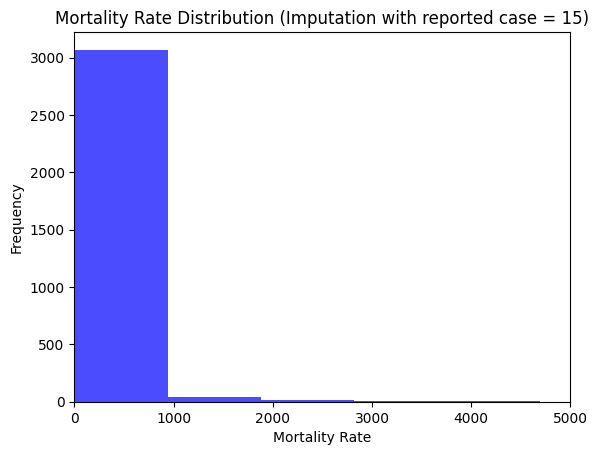

count     3134.000000
mean       136.170744
std        663.993981
min          9.200000
25%         45.000000
50%         54.300000
75%         66.100000
max      28142.589118
Name: Mortality_Rate, dtype: float64

In [13]:
# Consider estimating the missing value of Mortality_rate by take Number of Cases = 15

Fulldf1 = Fulldf.copy()
# Convert 'Mortality_Rate' to numeric and mark "*" as missing (NaN)
Fulldf1['Mortality_Rate'] = pd.to_numeric(Fulldf1['Mortality_Rate'], errors='coerce')

# Ensure POP_ESTIMATE_2022 is numeric and doesn't have missing values in relevant rows
Fulldf1['POP_ESTIMATE_2022'] = pd.to_numeric(Fulldf1['POP_ESTIMATE_2022'], errors='coerce')

# Impute missing values in Mortality_Rate using (15 / POP_ESTIMATE_2022) * 100000
# print(type(Fulldf1['Mortality_Rate']))
for index, value in Fulldf1['Mortality_Rate'].items():
    if np.isnan(value):
        # Use .loc to modify the specific row and column
        Fulldf1.loc[index, 'Mortality_Rate'] = (15 / Fulldf1.loc[index, 'POP_ESTIMATE_2022']) * 100000
print(Fulldf1['Mortality_Rate'])
# Now, let's check the statistics and plot the updated distribution
imputation_stats_corrected = Fulldf1['Mortality_Rate'].describe()

# Visualize the distribution after applying the correct imputation
plt.hist(Fulldf1['Mortality_Rate'], bins=30, color='blue', alpha=0.7)
plt.title('Mortality Rate Distribution (Imputation with reported case = 15)')
plt.xlabel('Mortality Rate')
plt.ylabel('Frequency')
plt.xlim(0,5000)
plt.show()

imputation_stats_corrected

0       215.334702
1       142.855782
2        47.300000
3        58.300000
4       844.927618
           ...    
3129     28.400000
3130     29.100000
3131     22.100000
3132     38.200000
3133     43.500000
Name: Mortality_Rate, Length: 3134, dtype: float64


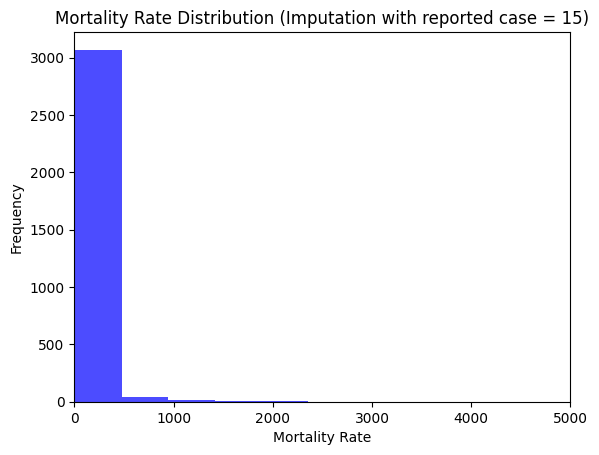

count     3134.000000
mean        91.921779
std        329.304836
min          9.200000
25%         44.900000
50%         54.200000
75%         65.800000
max      14071.294559
Name: Mortality_Rate, dtype: float64

In [14]:
# Consider estimating the missing value of Mortality_rate by take Number of Cases = 15/2 = 7.5

Fulldf2 = Fulldf.copy()
# Convert 'Mortality_Rate' to numeric and mark "*" as missing (NaN)
Fulldf2['Mortality_Rate'] = pd.to_numeric(Fulldf2['Mortality_Rate'], errors='coerce')

# Ensure POP_ESTIMATE_2022 is numeric and doesn't have missing values in relevant rows
Fulldf2['POP_ESTIMATE_2022'] = pd.to_numeric(Fulldf2['POP_ESTIMATE_2022'], errors='coerce')

# Impute missing values in Mortality_Rate using (15 / POP_ESTIMATE_2022) * 100000
# print(type(Fulldf1['Mortality_Rate']))
for index, value in Fulldf2['Mortality_Rate'].items():
    if np.isnan(value):
        # Use .loc to modify the specific row and column
        Fulldf2.loc[index, 'Mortality_Rate'] = (7.5 / Fulldf2.loc[index, 'POP_ESTIMATE_2022']) * 100000
print(Fulldf2['Mortality_Rate'])
# Now, let's check the statistics and plot the updated distribution
imputation_stats_corrected = Fulldf2['Mortality_Rate'].describe()

# Visualize the distribution after applying the correct imputation
plt.hist(Fulldf2['Mortality_Rate'], bins=30, color='blue', alpha=0.7)
plt.title('Mortality Rate Distribution (Imputation with reported case = 15)')
plt.xlabel('Mortality Rate')
plt.ylabel('Frequency')
plt.xlim(0,5000)
plt.show()

imputation_stats_corrected

0        28.711294
1        19.047438
2        47.300000
3        58.300000
4       112.657016
           ...    
3129     28.400000
3130     29.100000
3131     22.100000
3132     38.200000
3133     43.500000
Name: Mortality_Rate, Length: 3134, dtype: float64


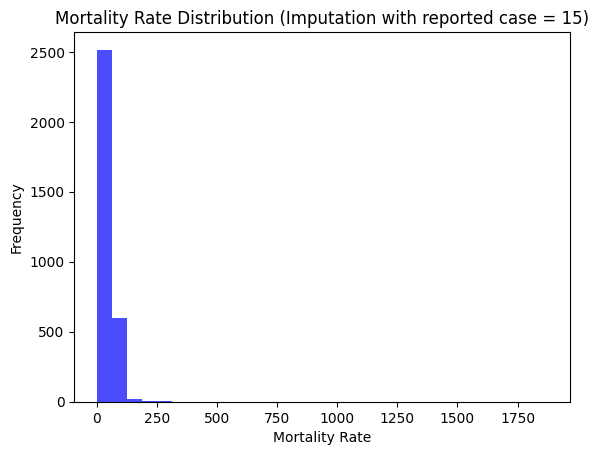

count    3134.000000
mean       53.572676
std        43.267949
min         1.774610
25%        41.700000
50%        51.800000
75%        60.993902
max      1876.172608
Name: Mortality_Rate, dtype: float64

In [15]:
# Consider estimating the missing value of Mortality_rate by take Number of Cases = 1

Fulldf3 = Fulldf.copy()
# Convert 'Mortality_Rate' to numeric and mark "*" as missing (NaN)
Fulldf3['Mortality_Rate'] = pd.to_numeric(Fulldf3['Mortality_Rate'], errors='coerce')

# Ensure POP_ESTIMATE_2022 is numeric and doesn't have missing values in relevant rows
Fulldf3['POP_ESTIMATE_2022'] = pd.to_numeric(Fulldf3['POP_ESTIMATE_2022'], errors='coerce')

# Impute missing values in Mortality_Rate using (15 / POP_ESTIMATE_2022) * 100000
# print(type(Fulldf1['Mortality_Rate']))
for index, value in Fulldf3['Mortality_Rate'].items():
    if np.isnan(value):
        # Use .loc to modify the specific row and column
        Fulldf3.loc[index, 'Mortality_Rate'] = (1 / Fulldf3.loc[index, 'POP_ESTIMATE_2022']) * 100000
print(Fulldf3['Mortality_Rate'])
# Now, let's check the statistics and plot the updated distribution
imputation_stats_corrected = Fulldf3['Mortality_Rate'].describe()

# Visualize the distribution after applying the correct imputation
plt.hist(Fulldf3['Mortality_Rate'], bins=30, color='blue', alpha=0.7)
plt.title('Mortality Rate Distribution (Imputation with reported case = 15)')
plt.xlabel('Mortality Rate')
plt.ylabel('Frequency')
plt.show()

imputation_stats_corrected

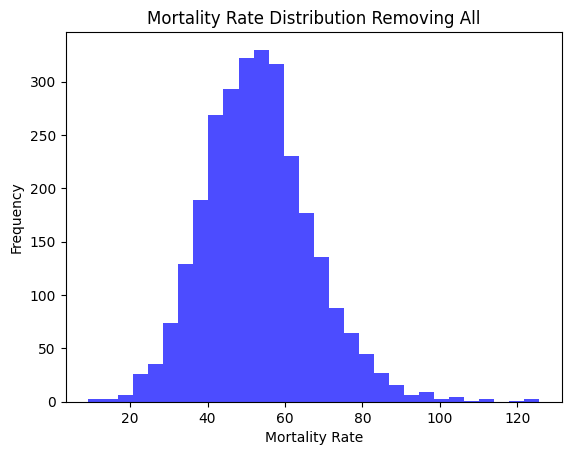

count    2809.000000
mean       53.188537
std        14.042077
min         9.200000
25%        43.700000
50%        52.600000
75%        61.200000
max       125.600000
Name: Mortality_Rate, dtype: float64

In [16]:
# Consider removing all the missing data
Fulldf4 = Fulldf.copy()
Fulldf4 = Fulldf4[Fulldf4['Mortality_Rate'] != '*']
# Convert 'Mortality_Rate' to numeric and mark "*" as missing (NaN)
Fulldf4['Mortality_Rate'] = pd.to_numeric(Fulldf4['Mortality_Rate'], errors='coerce')

# Ensure POP_ESTIMATE_2022 is numeric and doesn't have missing values in relevant rows
Fulldf4['POP_ESTIMATE_2022'] = pd.to_numeric(Fulldf4['POP_ESTIMATE_2022'], errors='coerce')

imputation_stats_corrected = Fulldf4['Mortality_Rate'].describe()

# Visualize the distribution after applying the correct imputation
plt.hist(Fulldf4['Mortality_Rate'], bins=30, color='blue', alpha=0.7)
plt.title('Mortality Rate Distribution Removing All')
plt.xlabel('Mortality Rate')
plt.ylabel('Frequency')
plt.show()

imputation_stats_corrected

By now, it seems that dropping all the missing data looks the best among all options. Let's do further EDA and figure out one new option.

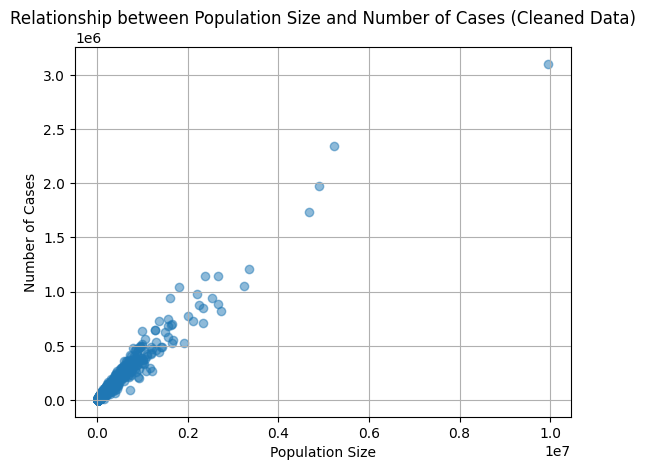

In [17]:
# Take a look at the relationship between POP_ESTIMATE_2022 and Report Cases
Fulldf5 = Fulldf.copy()

# Convert 'Mortality_Rate' and 'POP_ESTIMATE_2022' to numeric types
Fulldf5['Mortality_Rate'] = pd.to_numeric(Fulldf5['Mortality_Rate'], errors='coerce')
Fulldf5['POP_ESTIMATE_2022'] = pd.to_numeric(Fulldf5['POP_ESTIMATE_2022'], errors='coerce')

# Calculate the Number of Cases for each row
Fulldf5['Number_of_Cases'] = (Fulldf5['Mortality_Rate'] * Fulldf5['POP_ESTIMATE_2022']) / 100

# Create a new dataset (list1) with just the Number of Cases and Population Size
list1 = Fulldf5[['Number_of_Cases', 'POP_ESTIMATE_2022']]

# Remove rows with missing data (NaN) in either 'Number_of_Cases' or 'POP_ESTIMATE_2022'
list1_clean = list1.dropna()

# Plot the relationship between Population Size and Number of Cases after removing missing data
plt.scatter(list1_clean['POP_ESTIMATE_2022'], list1_clean['Number_of_Cases'], alpha=0.5)
plt.title('Relationship between Population Size and Number of Cases (Cleaned Data)')
plt.xlabel('Population Size')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

By the plot showing above, it's clear that there is a direct proportional relationship between the two variables population size and number of reported cases. I'm planning to use this characteristic to estimate the missing reported case (less than 16) by their population. Then use the estimated cases to calculate the missing mortality rates.  

Estimated reported cases  
My idea start from the dataset with rows that only containing Mortality_Rate = "*".   
Set the population feature in ascending order.   
Then divide the POP_ESTIMATE_2022 (325 rows in total) into 16 equal sized groups.  
Assign 0 reported cases to group 1, 1 to group 2, 2 to group 3 and so on until 15 to group 16.  
Replace the missing data with calculated mortality rate.

In [18]:
Fulldf6 = Fulldf.copy()

# Convert relevant columns to numeric, replacing "*" with NaN for Mortality_Rate
Fulldf6['Mortality_Rate'] = pd.to_numeric(Fulldf6['Mortality_Rate'], errors='coerce')
Fulldf6['POP_ESTIMATE_2022'] = pd.to_numeric(Fulldf6['POP_ESTIMATE_2022'], errors='coerce')


df_filtered = Fulldf6[Fulldf6['Mortality_Rate'].isna()]
df_sorted = df_filtered.sort_values(by='POP_ESTIMATE_2022', ascending=True)
df_sorted['Group'] = pd.qcut(df_sorted['POP_ESTIMATE_2022'], q=16, labels=False)

# Assign reported cases (0 to 15) based on the group number
df_sorted['Reported_Cases'] = df_sorted['Group']

# Calculate the new Mortality_Rate using the formula: Mortality Rate = (Reported Cases / Population) * 100,000
df_sorted['Mortality_Rate'] = (df_sorted['Reported_Cases'] / df_sorted['POP_ESTIMATE_2022']) * 100000
Fulldf6.update(df_sorted)


In [19]:
df_sorted

State_x                    AreaName  All_Poverty  M_Poverty  F_Poverty  \
2666      TX        Loving County, Texas           33         24          9   
542       HI      Kalawao County, Hawaii           12          5          7   
2650      TX          King County, Texas           19         10          9   
2646      TX        Kenedy County, Texas          151         67         84   
1859      NE  McPherson County, Nebraska           64         32         32   
...      ...                         ...          ...        ...        ...   
664       ID      Franklin County, Idaho         1696        773        923   
287       CO     Pitkin County, Colorado         1709        663       1046   
264       CO   Gunnison County, Colorado         2509       1163       1346   
650       ID        Blaine County, Idaho         2218        989       1229   
676       ID       Madison County, Idaho        13232       6357       6875   

       FIPS  Med_Income  Med_Income_White  M_With  M_Without  ...  \
2666  48301         NaN               NaN      53         21  ...   
542   15005     66250.0               NaN      32          4  ...   
2650  48269     63250.0           63500.0      87         49  ...   
2646  48261     36438.0           36313.0     198         97  ...   
1859  31117     54306.0           54306.0     219          4  ...   
...     ...         ...               ...     ...        ...  ...   
664   16041     48133.0           49589.0    5577        947  ...   
287   08097     71196.0           71372.0    7865       1330  ...   
264   08051     48071.0           48628.0    6999       1402  ...   
650   16013     60088.0           60597.0    8753       2073  ...   
676   16065     32233.0           32276.0   16867       2083  ...   

      Incidence_Rate  Avg_Ann_Incidence  Recent_Trend  Mortality_Rate  \
2666               *         3 or fewer             *        0.000000   
542                *         3 or fewer             *        0.000000   
2650               *         3 or fewer             *        0.000000   
2646               *         3 or fewer             *        0.000000   
1859               *         3 or fewer             *        0.000000   
...              ...                ...           ...             ...   
664                *         3 or fewer             *       96.340661   
287             24.1                  4        rising       86.715728   
264             24.8                  3             *       84.747199   
650             22.6                  5        stable       58.852032   
676                *         3 or fewer             *       26.619154   

     Avg_Ann_Deaths POP_ESTIMATE_2022 State_y  County Group  Reported_Cases  
2666              *             53.30    48.0   301.0     0               0  
542               *             84.05    15.0     5.0     0               0  
2650              *            239.85    48.0   269.0     0               0  
2646              *            366.95    48.0   261.0     0               0  
1859              *            381.30    31.0   117.0     0               0  
...             ...               ...     ...     ...   ...             ...  
664               *          15569.75    16.0    41.0    15              15  
287               *          17297.90     8.0    97.0    15              15  
264               *          17699.70     8.0    51.0    15              15  
650               *          25487.65    16.0    13.0    15              15  
676               *          56350.40    16.0    65.0    15              15  

[325 rows x 24 columns]

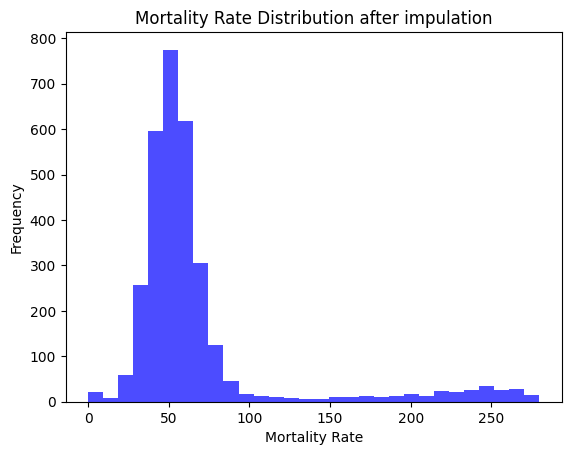

count    3134.000000
mean       68.008465
std        51.082953
min         0.000000
25%        44.700000
50%        54.100000
75%        65.600000
max       279.633370
Name: Mortality_Rate, dtype: float64

In [20]:
plt.hist(Fulldf6['Mortality_Rate'], bins=30, color='blue', alpha=0.7)
plt.title('Mortality Rate Distribution after impulation')
plt.xlabel('Mortality Rate')
plt.ylabel('Frequency')
plt.show()
imputation_stats_corrected = Fulldf6['Mortality_Rate'].describe()
imputation_stats_corrected

By compare the six graphs of mortality_rate after operation. I decide to delete all rows with the mortality rate missed as it has the smallest standard deviation and a normal pattern. Although bias may happen as 10.4% of the data will be affect.

### 1.6 Reformat the rest of the columns specified in 1.3 to numerical [5 Marks]
In each column reformat all the cells that you can.

*Hint*: You can keep the cells that you cannot reformat until you decide if you want to use the specific column in the model. This is because you want to lose as least data as possible. So you can drop the associated rows if you want to use the column and keep them if the specific column is not used.

In [21]:
# Feature 'Incidence_Rate'
# Clean all rows with Incidence_Rate = "*"
nfulldf = Fulldf4[Fulldf4['Incidence_Rate'] != '*']

# Change the data type to numeric
nfulldf['Incidence_Rate'] = pd.to_numeric(nfulldf['Incidence_Rate'], errors='coerce')

C:\Users\frank\AppData\Local\Temp\ipykernel_28944\535100088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfulldf['Incidence_Rate'] = pd.to_numeric(nfulldf['Incidence_Rate'], errors='coerce')


In [22]:
# Feature 'Avg_Ann_Incidence'
nfulldf['Avg_Ann_Incidence'] = pd.to_numeric(nfulldf['Avg_Ann_Incidence'], errors='coerce')

C:\Users\frank\AppData\Local\Temp\ipykernel_28944\1500849615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfulldf['Avg_Ann_Incidence'] = pd.to_numeric(nfulldf['Avg_Ann_Incidence'], errors='coerce')


In [23]:
# Feature 'Avg_Ann_Deaths'
nfulldf['Avg_Ann_Deaths'] = pd.to_numeric(nfulldf['Avg_Ann_Deaths'], errors='coerce')

C:\Users\frank\AppData\Local\Temp\ipykernel_28944\174323749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfulldf['Avg_Ann_Deaths'] = pd.to_numeric(nfulldf['Avg_Ann_Deaths'], errors='coerce')


In [24]:
# Check all the features type
for i in nfulldf.columns:
  print('The format of', i, 'is', nfulldf[i].dtype)

The format of State_x is object
The format of AreaName is object
The format of All_Poverty is int64
The format of M_Poverty is int64
The format of F_Poverty is int64
The format of FIPS is object
The format of Med_Income is float64
The format of Med_Income_White is float64
The format of M_With is int64
The format of M_Without is int64
The format of F_With is int64
The format of F_Without is int64
The format of All_With is int64
The format of All_Without is int64
The format of Incidence_Rate is float64
The format of Avg_Ann_Incidence is float64
The format of Recent_Trend is object
The format of Mortality_Rate is float64
The format of Avg_Ann_Deaths is float64
The format of POP_ESTIMATE_2022 is float64
The format of State_y is float64
The format of County is float64


### 1.7 Make the numerical data useful [5 Marks]
We know we have many columns of data, some of them are dependent on the populations. As a *Hint*, convert all the raw data to per 100,000 persons rates (divide by population and multiply by 100,000).

In [25]:
newfulldf = nfulldf.copy()
for i in newfulldf.columns:
    # Check if the column is in the Feature list and if 'Raw' is in its description
    if i in data_dict['Feature'].values:
        definition = data_dict.loc[data_dict['Feature'] == i, 'Definition'].values[0]
        
        # Process columns with 'Raw' in the description
        if isinstance(definition, str) and 'Raw' in definition:
            # Perform the conversion
            newfulldf[i] = pd.to_numeric(newfulldf[i], errors='coerce') / newfulldf['POP_ESTIMATE_2022'] * 100000

newfulldf.head()

State_x                              AreaName   All_Poverty     M_Poverty  \
2       AK        Anchorage Municipality, Alaska   8125.041515   3634.761818   
3       AK            Bethel Census Area, Alaska  23318.879262  11750.278528   
7       AK  Fairbanks North Star Borough, Alaska   7931.254278   3604.464502   
9       AK       Juneau City and Borough, Alaska   6496.675457   3525.447108   
10      AK       Kenai Peninsula Borough, Alaska   8934.649900   4173.147021   

       F_Poverty          FIPS     Med_Income  Med_Income_White        M_With  \
2    4490.279696    686.316963   26612.110131      29639.039747  41025.106120   
3   11568.600734  10954.102311  272580.813222     495055.959432  34176.799211   
7    4326.789776   2138.328359   72711.349203      75958.743563  41543.934463   
9    2971.228349   6496.675457  264011.343011     278812.062879  42302.286306   
10   4761.502879   3411.177958  102373.919439     103947.690985  35994.196818   

       M_Without  ...      All_With   All_Without  Incidence_Rate  \
2    7897.741491  ...  82620.670746  15166.245845            61.5   
3   14470.101980  ...  69587.938732  23949.408078            62.7   
7    7117.871003  ...  82683.735097  12562.934891            58.1   
9    7491.190231  ...  84121.170695  14305.001978            35.1   
10  10344.453420  ...  70826.149685  19078.162111            64.9   

    Avg_Ann_Incidence  Recent_Trend  Mortality_Rate Avg_Ann_Deaths  \
2           44.508674        stable            47.3      32.617044   
3           32.060787        stable            58.3      26.717323   
7           36.832450        stable            54.0      31.716832   
9           27.710938        stable            34.4      24.631945   
10          62.693657        stable            50.1      45.010831   

    POP_ESTIMATE_2022  State_y  County  
2           294324.65      2.0    20.0  
3            18714.45      2.0    50.0  
7            97739.90      2.0    90.0  
9            32478.15      2.0   110.0  
10           62207.25      2.0   122.0  

[5 rows x 22 columns]

In [26]:
newfulldf

State_x                              AreaName   All_Poverty  \
2         AK        Anchorage Municipality, Alaska   8125.041515   
3         AK            Bethel Census Area, Alaska  23318.879262   
7         AK  Fairbanks North Star Borough, Alaska   7931.254278   
9         AK       Juneau City and Borough, Alaska   6496.675457   
10        AK       Kenai Peninsula Borough, Alaska   8934.649900   
...      ...                                   ...           ...   
3129      WY            Sweetwater County, Wyoming  11934.973507   
3130      WY                 Teton County, Wyoming   6862.112592   
3131      WY                 Uinta County, Wyoming  13400.974102   
3132      WY              Washakie County, Wyoming  14368.760268   
3133      WY                Weston County, Wyoming  13624.404466   

         M_Poverty     F_Poverty           FIPS     Med_Income  \
2      3634.761818   4490.279696     686.316963   26612.110131   
3     11750.278528  11568.600734   10954.102311  272580.813222   
7      3604.464502   4326.789776    2138.328359   72711.349203   
9      3525.447108   2971.228349    6496.675457  264011.343011   
10     4173.147021   4761.502879    3411.177958  102373.919439   
...            ...           ...            ...            ...   
3129   5136.899432   6798.074076  132226.198187  162865.903801   
3130   4298.246349   2563.866243  234765.523540  315560.824794   
3131   6844.153030   6556.821072  263973.282838  266460.352900   
3132   6179.704284   8189.055984  708239.605712  602198.913181   
3133   5034.487663   8589.916803  797056.104672  821133.470810   

      Med_Income_White        M_With     M_Without  ...      All_With  \
2         29639.039747  41025.106120   7897.741491  ...  82620.670746   
3        495055.959432  34176.799211  14470.101980  ...  69587.938732   
7         75958.743563  41543.934463   7117.871003  ...  82683.735097   
9        278812.062879  42302.286306   7491.190231  ...  84121.170695   
10       103947.690985  35994.196818  10344.453420  ...  70826.149685   
...                ...           ...           ...  ...           ...   
3129     163599.746576  46935.262561   7829.229359  ...  90824.251734   
3130     325305.192248  37486.070498  10716.290605  ...  77515.060620   
3131     266286.069581  43015.007207   6655.738632  ...  84046.952868   
3132     607986.857071  42322.760015   8732.465563  ...  86427.397953   
3133     822612.529332  41626.964375   6456.659319  ...  85529.403399   

       All_Without  Incidence_Rate  Avg_Ann_Incidence  Recent_Trend  \
2     15166.245845            61.5          44.508674        stable   
3     23949.408078            62.7          32.060787        stable   
7     12562.934891            58.1          36.832450        stable   
9     14305.001978            35.1          27.710938        stable   
10    19078.162111            64.9          62.693657        stable   
...            ...             ...                ...           ...   
3129  14160.098066            39.9          33.034723        stable   
3130  15709.964726            23.7          20.946620        stable   
3131  13735.409660            31.7          28.262160        stable   
3132  17616.580311            50.0          75.824592        stable   
3133  10922.278319            44.9          56.886866        stable   

      Mortality_Rate Avg_Ann_Deaths  POP_ESTIMATE_2022  State_y  County  
2               47.3      32.617044          294324.65      2.0    20.0  
3               58.3      26.717323           18714.45      2.0    50.0  
7               54.0      31.716832           97739.90      2.0    90.0  
9               34.4      24.631945           32478.15      2.0   110.0  
10              50.1      45.010831           62207.25      2.0   122.0  
...              ...            ...                ...      ...     ...  
3129            28.4      21.236608           42379.65     56.0    37.0  
3130            29.1      20.946620           23870.20     56.0    39.0  

## **Part 2: Exploratory analysis [15 Marks]**

### 2.1 Visualizing different features [5 Marks]
Here, show different feature and how they change with respect to each other.
*Hint*: A good function to use here is `sns.pairplot`. Remember to have the plots labeled properly so that they are self explanatory.


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
print(newfulldf.columns.values)

['State_x' 'AreaName' 'All_Poverty' 'M_Poverty' 'F_Poverty' 'FIPS'
 'Med_Income' 'Med_Income_White' 'M_With' 'M_Without' 'F_With' 'F_Without'
 'All_With' 'All_Without' 'Incidence_Rate' 'Avg_Ann_Incidence'
 'Recent_Trend' 'Mortality_Rate' 'Avg_Ann_Deaths' 'POP_ESTIMATE_2022'
 'State_y' 'County']


Text(0.5, 0.98, 'Pairplot of Average and Rate')

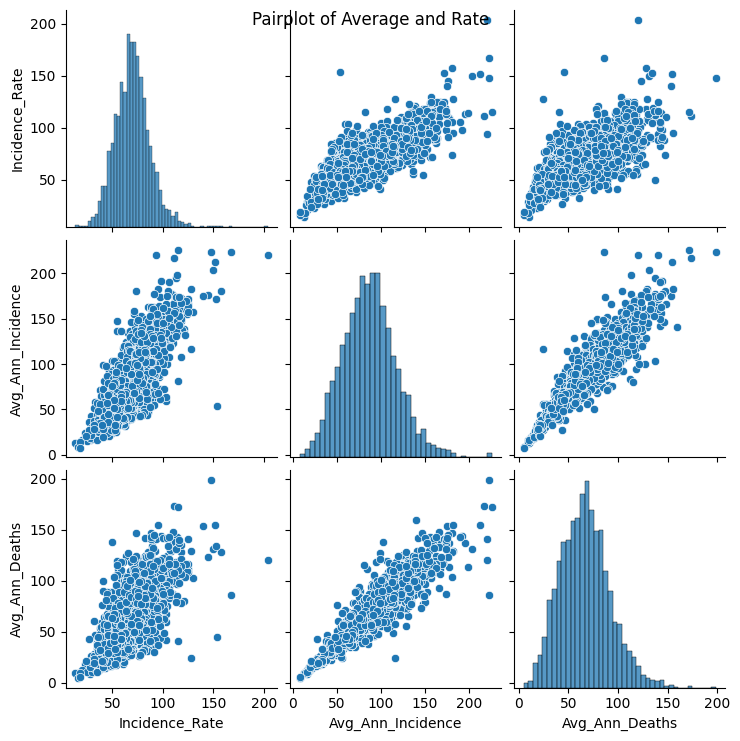

In [28]:
sns.pairplot(newfulldf[['Incidence_Rate', 'Avg_Ann_Incidence','Avg_Ann_Deaths']])
plt.suptitle('Pairplot of Average and Rate')

Text(0.5, 0.98, 'Pairplot of without health insurance')

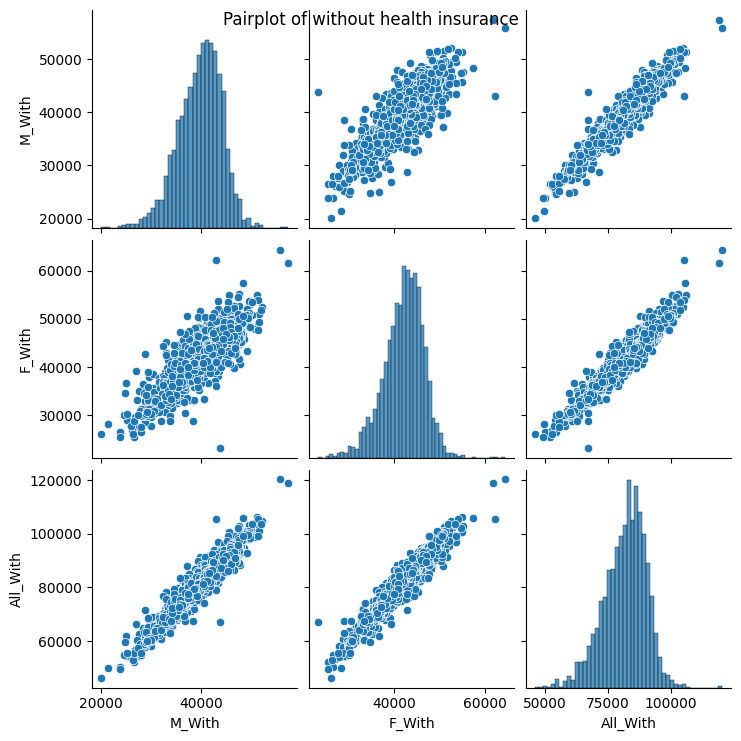

In [29]:
sns.pairplot(newfulldf[['M_With', 'F_With', 'All_With']])
plt.suptitle('Pairplot of without health insurance')

Text(0.5, 0.98, 'Pairplot of with health insurancecome')

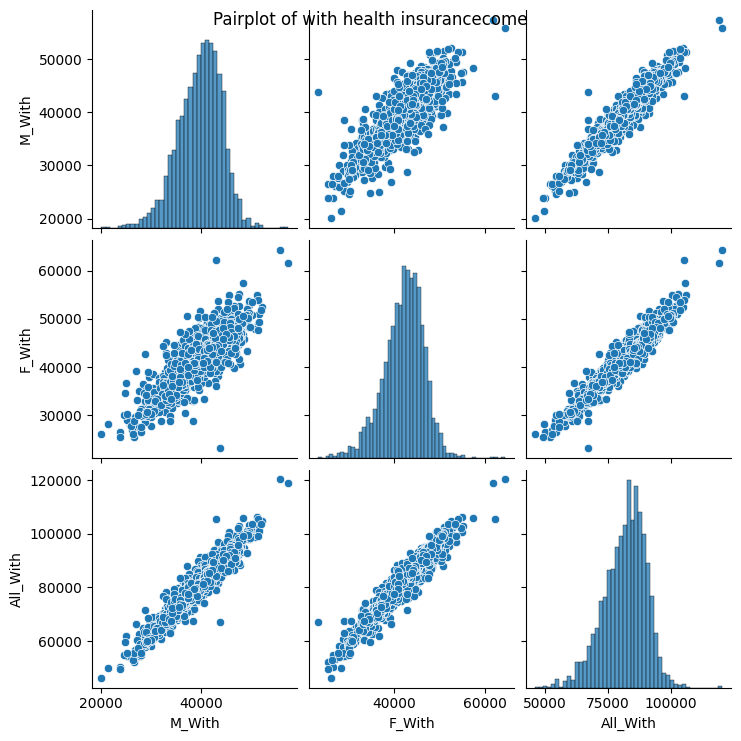

In [30]:
sns.pairplot(newfulldf[['M_With', 'F_With', 'All_With']])
plt.suptitle('Pairplot of with health insurancecome')

Text(0.5, 0.98, 'Pairplot of Income')

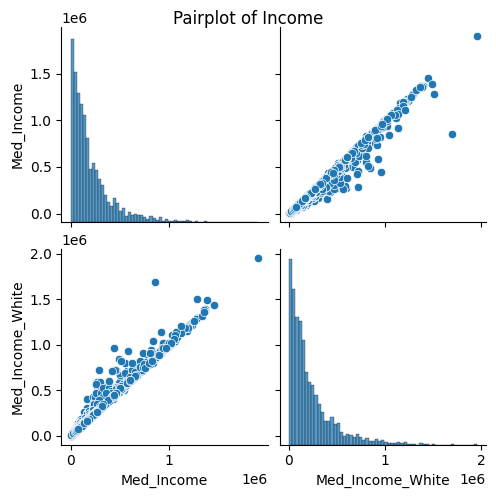

In [31]:
sns.pairplot(newfulldf[['Med_Income', 'Med_Income_White']])
plt.suptitle('Pairplot of Income')

Text(0.5, 0.98, 'Pairplot of Poverty')

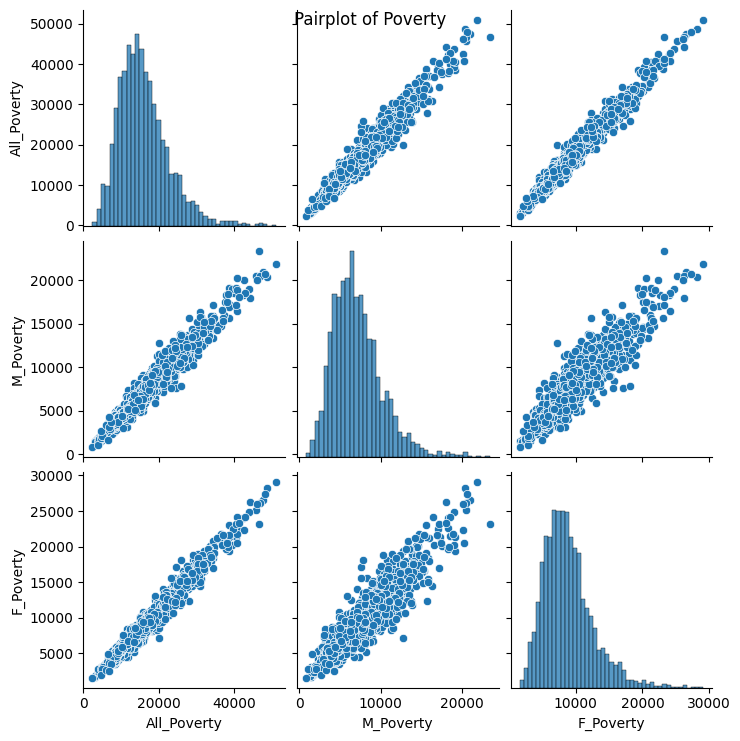

In [32]:
sns.pairplot(newfulldf[['All_Poverty', 'M_Poverty', 'F_Poverty']])
plt.suptitle('Pairplot of Poverty')

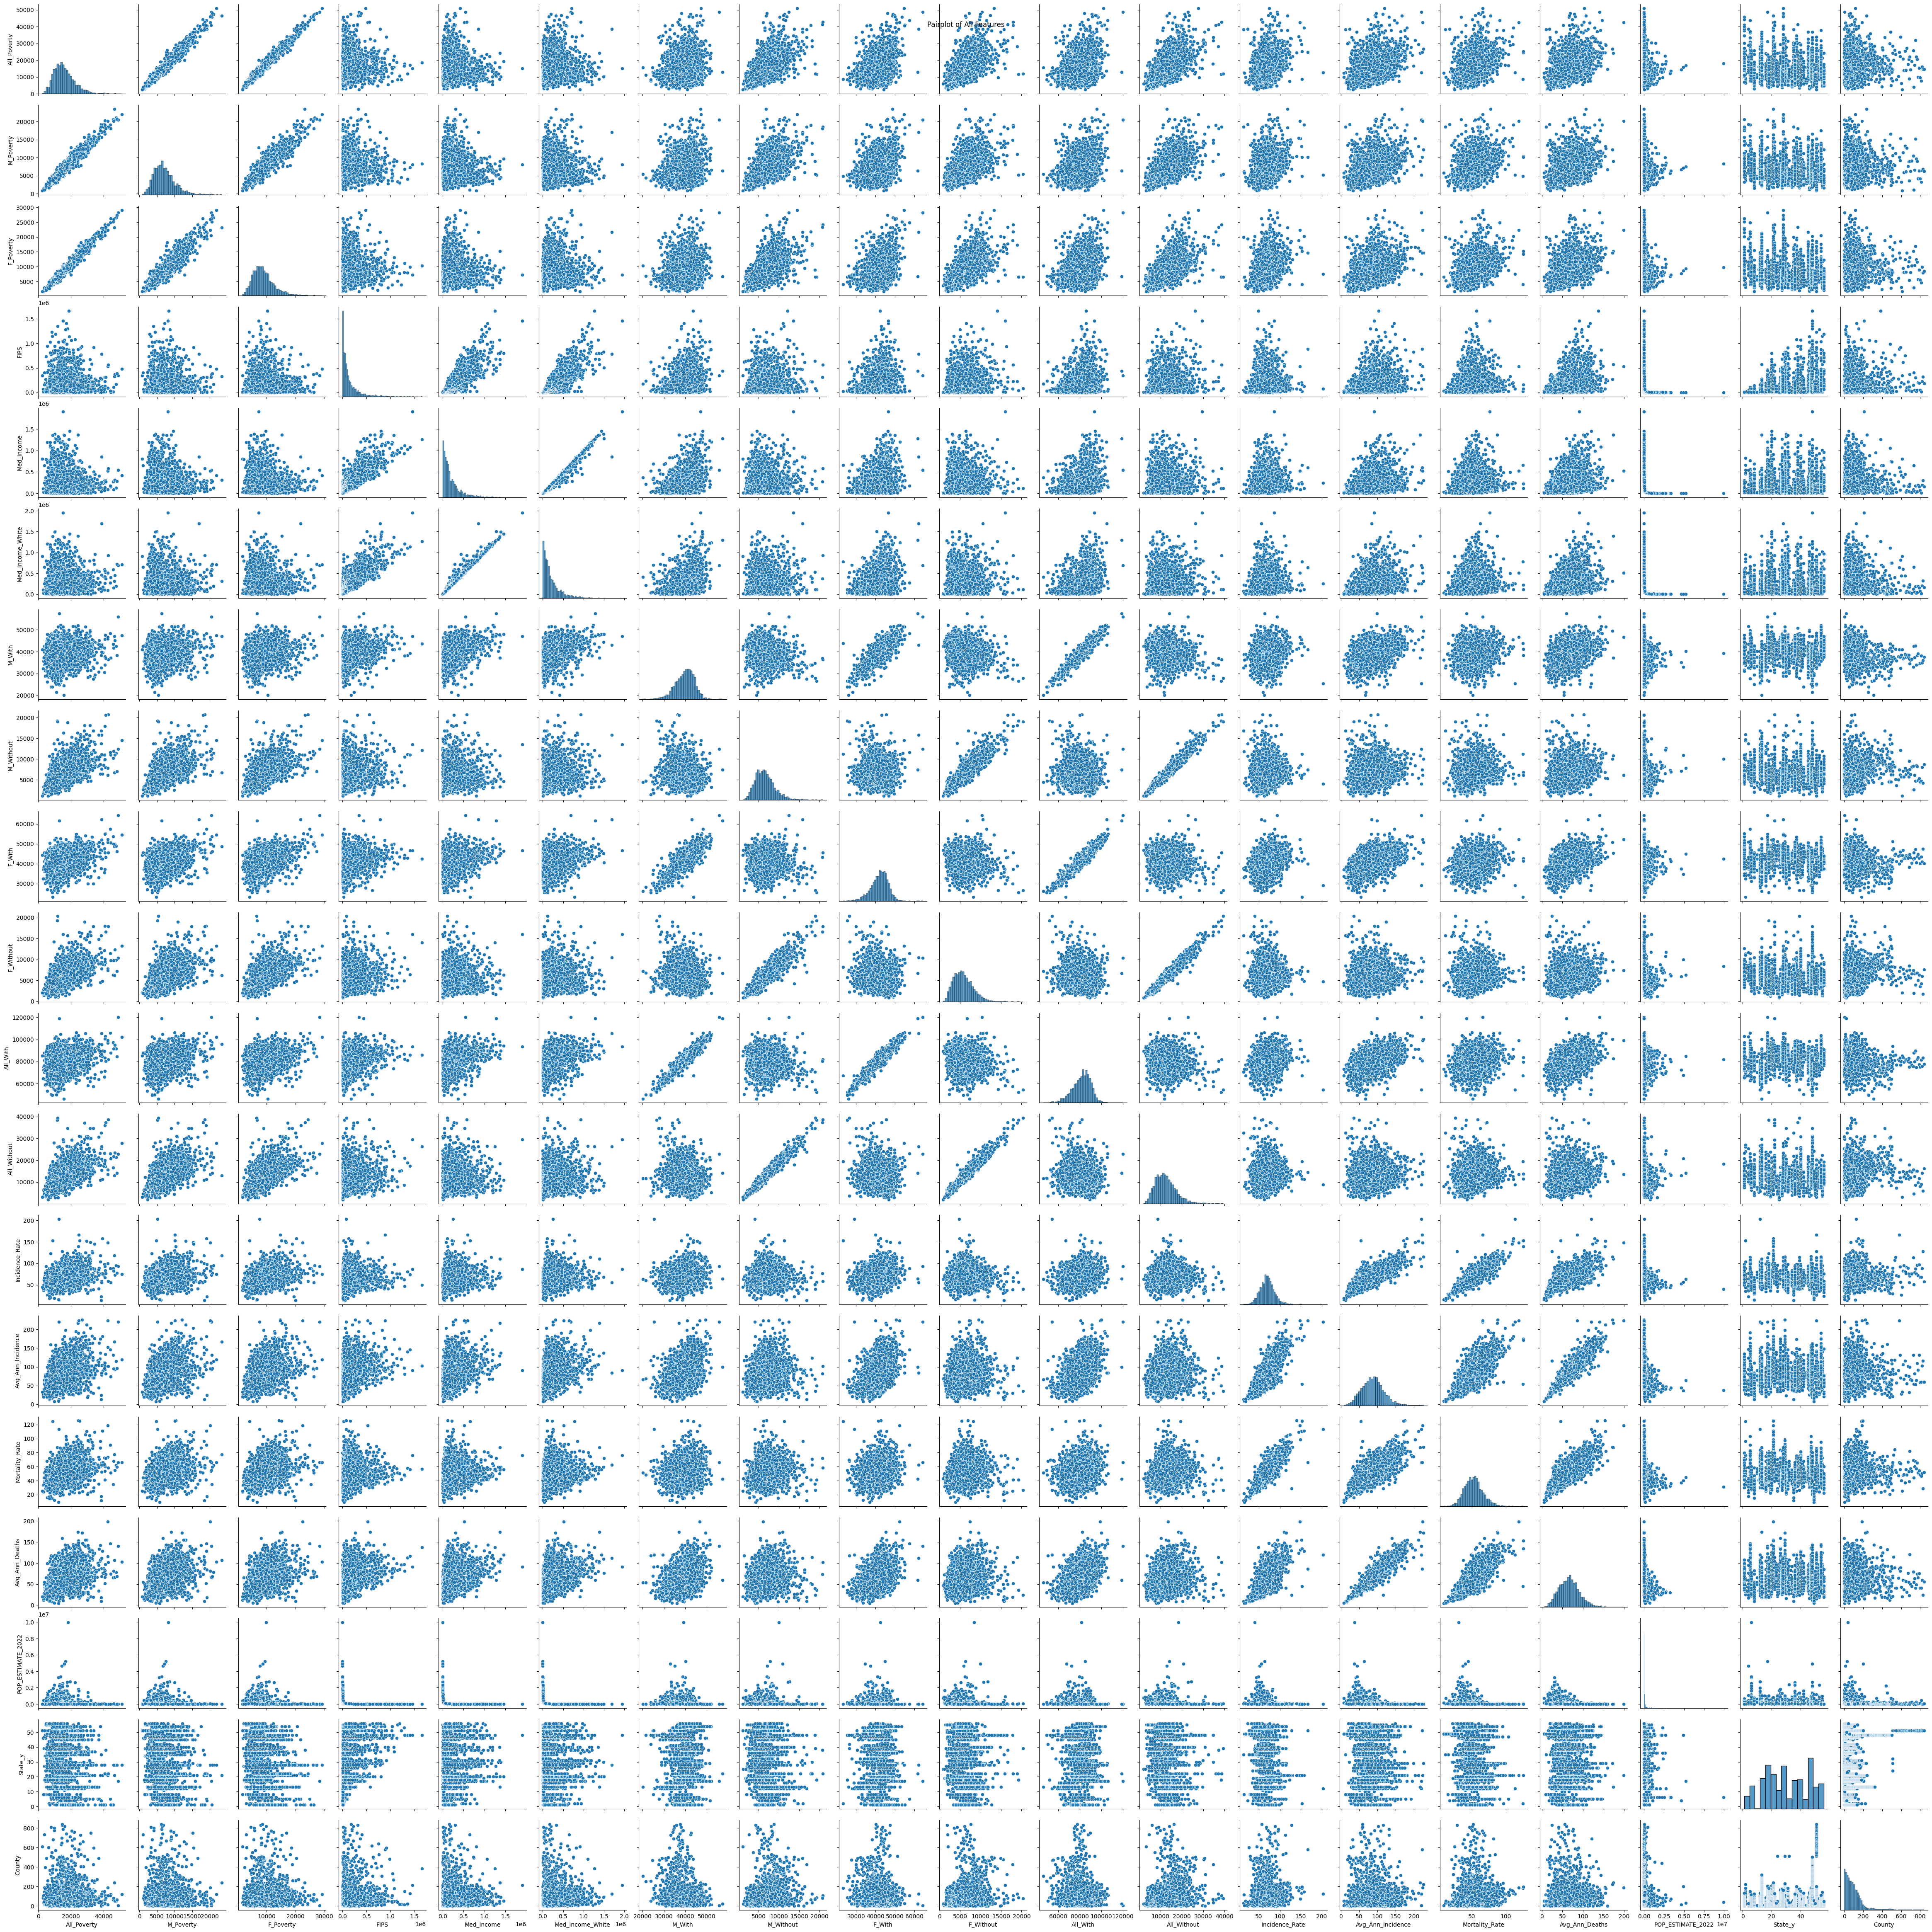

In [33]:
sns.pairplot(newfulldf)
plt.suptitle('Pairplot of All Features')
plt.show()

### 2.2 Selecting the most important features [10 Marks]
In this step, we want to remove the redundant features.

*Hint*: This can be done by analyzing the correlation between the features and removing the highly correlated features. Remember, throughout the project, write down specific reasons for any desicion you make.

By looking at the scatterplots where points form a strong diagonal line, they are either sloping upwards (positive correlation) or downwards (negative correlation).
Features that display such patterns are likely highly correlated and thus could be redundant. In the plots that have regions where the scatter points are closely aligned in a straight line. It's the typical indicators of high correlation.

In [34]:
import pandas as pd
# Remove the useless features 'State_x', 'AreaName', 'FIPS', 'State_y' and 'County', and temporarily remove categorical data 'Recent_Trend'.
newfulldf_2 = newfulldf[['All_Poverty', 'M_Poverty', 'F_Poverty',
                         'Med_Income', 'Med_Income_White', 'M_With', 'M_Without', 'F_With', 
                         'F_Without', 'All_With', 'All_Without', 'Incidence_Rate', 
                         'Avg_Ann_Incidence', 'Mortality_Rate', 'Avg_Ann_Deaths', 
                         'POP_ESTIMATE_2022']]

newfulldf_2
# Assuming your dataset is stored in a DataFrame called
correlation_matrix = newfulldf_2.corr()

# Display the correlation matrix
print(correlation_matrix)

                   All_Poverty  M_Poverty  F_Poverty  Med_Income  \
All_Poverty           1.000000   0.980459   0.987016   -0.011478   
M_Poverty             0.980459   1.000000   0.936131   -0.016392   
F_Poverty             0.987016   0.936131   1.000000   -0.007133   
Med_Income           -0.011478  -0.016392  -0.007133    1.000000   
Med_Income_White      0.059652   0.050911   0.065063    0.987693   
M_With                0.039015   0.043418   0.034291    0.321706   
M_Without             0.620815   0.616938   0.606015    0.076681   
F_With                0.234505   0.202530   0.253826    0.168637   
F_Without             0.602918   0.578783   0.605177    0.080878   
All_With              0.143379   0.128819   0.151118    0.253827   
All_Without           0.625362   0.611063   0.618939    0.080512   
Incidence_Rate        0.319386   0.304423   0.322501    0.003736   
Avg_Ann_Incidence     0.387128   0.367712   0.391832    0.305285   
Mortality_Rate        0.394918   0.375217   0.39

In [35]:
# Create a mask to identify correlations above the threshold
threshold = 0.8 # Set 0.8 as the high correlation threshold
high_corr_pairs = correlation_matrix[correlation_matrix.abs() > threshold].stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]  # Exclude self-correlation
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Display the highly correlated feature pairs
print(high_corr_pairs)

             Feature1           Feature2  Correlation
1         All_Poverty          M_Poverty     0.980459
2         All_Poverty          F_Poverty     0.987016
3           M_Poverty        All_Poverty     0.980459
5           M_Poverty          F_Poverty     0.936131
6           F_Poverty        All_Poverty     0.987016
7           F_Poverty          M_Poverty     0.936131
10         Med_Income   Med_Income_White     0.987693
11   Med_Income_White         Med_Income     0.987693
14             M_With             F_With     0.851636
15             M_With           All_With     0.961243
17          M_Without          F_Without     0.914702
18          M_Without        All_Without     0.978513
19             F_With             M_With     0.851636
21             F_With           All_With     0.963134
22          F_Without          M_Without     0.914702
24          F_Without        All_Without     0.978374
25           All_With             M_With     0.961243
26           All_With       

By the correlation matrix as well as the plot in Part 2.1 shown, there are highly correlation between the Income, Poverty and With or without Insurance features. In this case, I choose to treat the more detailed features as redundants and drop them. I choose to keep features 'All_Poverty', 'Med_Income', 'All_With', 'All_Without'. For other featurres like 'Avg_Ann_Deaths' and 'Avg_Ann_Incidence', although they are highly correlated, but they are crucial variables to our response 'Mortality_Rate'. So I decide to keep them. The 'Recent_Trend' variable is also considered as significant, but it's a categorical variable, I need to transform it to a binary variable before the model construction process.

In [36]:
# Label Encoding for variable "Recent _Trend"is preferred when the categories are ordinal and the order matters ("falling" < "stable" < "rising") This will assign an integer to each category.
newfulldf_2 = newfulldf[['All_Poverty','Med_Income','All_With', 'All_Without', 'Incidence_Rate', 
                         'Avg_Ann_Incidence', 'Mortality_Rate', 'Avg_Ann_Deaths', 
                         'POP_ESTIMATE_2022', 'Recent_Trend']]

for i in newfulldf_2['Recent_Trend']:
    if i == 'falling':
        newfulldf_2['Recent_Trend'] = 1
    elif i == 'stable':
        newfulldf_2['Recent_Trend'] = 2
    else:
        newfulldf_2['Recent_Trend'] = 3

C:\Users\frank\AppData\Local\Temp\ipykernel_28944\309313699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newfulldf_2['Recent_Trend'] = 2
C:\Users\frank\AppData\Local\Temp\ipykernel_28944\309313699.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newfulldf_2['Recent_Trend'] = 1
C:\Users\frank\AppData\Local\Temp\ipykernel_28944\309313699.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [37]:
# Removing all of the na data
newfulldf_2.dropna(inplace=True)
print(newfulldf_2.isna().sum())


All_Poverty          0
Med_Income           0
All_With             0
All_Without          0
Incidence_Rate       0
Avg_Ann_Incidence    0
Mortality_Rate       0
Avg_Ann_Deaths       0
POP_ESTIMATE_2022    0
Recent_Trend         0
dtype: int64


C:\Users\frank\AppData\Local\Temp\ipykernel_28944\3819128884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newfulldf_2.dropna(inplace=True)


## **Part 3: Regression Model Construction [30 Marks]**

### 3.1 Splitting the dataset [5 Marks]

Split the dataset to three parts: train, validation, and test. You choose the ratios for the three datasets and provide a one-sentence rationale on why you went with such ratios.

*Hint*: You can use the validation set approach from ch5 lab (google colab).

In [38]:
from sklearn.model_selection import train_test_split
feature_data = newfulldf_2.copy()
feature_data.drop(columns=['Mortality_Rate'])
target_data = pd.DataFrame(newfulldf_2['Mortality_Rate'])
X_t, X_test, y_t, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.2, random_state=0)

I choose to set 30% of the data to be testing data and 70% data to be the accessible data. Among the 70% accessible data, I choose 20% of them to be used for validation and 80% as training data.

This ratio ensures that the model is trained on the majority of the data and validated on a smaller portion to fine-tune and prevent overfitting, and tested on a separate unseen dataset.

### 3.2 Model training [15 Marks]
Create three different regression models, using different features (and optionally nonlinear transformations). The purpose of these models is to predict mortality rate of lung cancer with reasonably high R2 (at least exceeding 70%) using a carefully chosen and justified set of features. Use the visualizations from section 2.1 to inform the feature selection for each model.

*Hint:* The purpose here is to create general linear models using a selection of different features, interaction terms, and nonlinear transformation of the predictors. Chapter 3 lab could assist you creating the models.

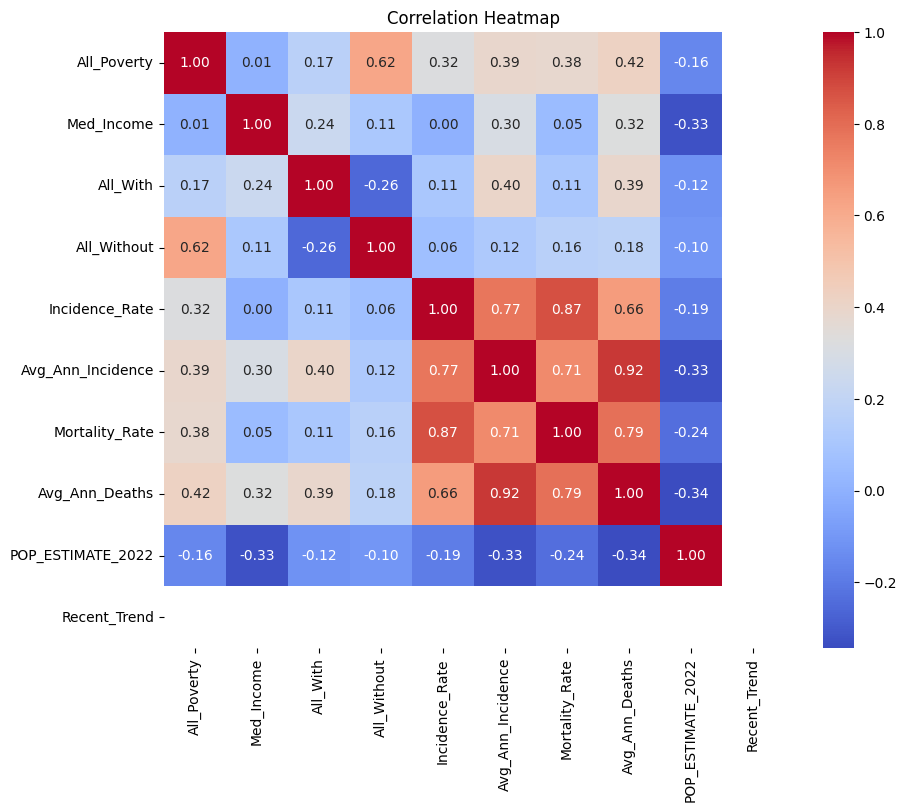

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
selected_df = newfulldf_2
correlation_matrix = selected_df.corr()
mortality_rate_correlation = correlation_matrix['Mortality_Rate']

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [80]:
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Add an intercept column for the training data
X_trainnew = pd.DataFrame({'intercept': np.ones(X_train.shape[0]), **X_train})
X_trainnew = X_trainnew.drop(["Mortality_Rate"],axis =1)


In [81]:
# Take a look at the full model
model = sm.OLS(y_train, X_trainnew)
result = model.fit()
summarize(result)       
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     4301.
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:31:18   Log-Likelihood:                -3481.7
No. Observations:                1425   AIC:                             6981.
Df Residuals:                    1416   BIC:                             7029.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept             0.4776      0.212      2.253      0.024       0.062       0.893
All_Poverty        8.754e-06    1.7e-05      0.516      0.606   -2.45e-05    4.21e-05
Med_Income          -2.5e-06   4.34e-07     -5.755      0.000   -3.35e-06   -1.65e-06
All_With          -2.337e-05   1.17e-05     -1.994      0.046   -4.64e-05   -3.79e-07
All_Without        4.247e-05   2.27e-05      1.872      0.061   -2.04e-06     8.7e-05
Incidence_Rate        0.7347      0.008     93.083      0.000       0.719       0.750
Avg_Ann_Incidence    -0.5143      0.008    -64.066      0.000      -0.530      -0.499
Avg_Ann_Deaths        0.6946      0.008     87.736      0.000       0.679       0.710
POP_ESTIMATE_2022 -9.834e-07   2.97e-07     -3.307      0.001   -1.57e-06      -4e-07
Recent_Trend          0.9553      0.424      2.253      0.024       0.124       1.787
==============================================================================
Omnibus:                      248.223   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4267.490
Skew:                          -0.231   Prob(JB):                         0.00
Kurtosis:                      11.465   Cond. No.                     5.34e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.7e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
X_trainnew.columns

Index(['intercept', 'All_Poverty', 'Med_Income', 'All_With', 'All_Without',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'Mortality_Rate',
       'Avg_Ann_Deaths', 'POP_ESTIMATE_2022', 'Recent_Trend'],
      dtype='object')

As "Mortality_Rate" is your target variable, I should focus on features that have a high correlation with "Mortality_Rate" but low correlation with other independent variables to avoid multicollinearity. Potential features are 'Incidence_Rate', 'Avg_Ann_Deaths', 'Avg_Ann_Incidence'.

In [43]:
# Model 1 linear model with selected features
X1 = pd.DataFrame({'intercept': np.ones(X_trainnew.shape[0]),
                    'Incidence_Rate': X_trainnew['Incidence_Rate'],
                    'Avg_Ann_Deaths': X_trainnew['Avg_Ann_Deaths'],
                    'Avg_Ann_Incidence': X_trainnew['Avg_Ann_Incidence'],
                    'All_Poverty': X_trainnew['All_Poverty']})
model1 = sm.OLS(y_train, X1)
result1 = model1.fit()
summarize(result1)
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     8314.
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:48:22   Log-Likelihood:                -3507.0
No. Observations:                1425   AIC:                             7024.
Df Residuals:                    1420   BIC:                             7050.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -0.0470      0.330     -0.142      0.887      -0.694       0.600
Incidence_Rate        0.7526      0.007    107.415      0.000       0.739       0.766
Avg_Ann_Deaths        0.6928      0.008     87.180      0.000       0.677       0.708
Avg_Ann_Incidence    -0.5276      0.008    -68.887      0.000      -0.543      -0.513
All_Poverty        3.884e-05   1.22e-05      3.177      0.002    1.49e-05    6.28e-05
==============================================================================
Omnibus:                      346.160   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5130.411
Skew:                          -0.708   Prob(JB):                         0.00
Kurtosis:                      12.187   Cond. No.                     7.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
# Model 2 linear model with interaction term
X2 = MS(['All_Poverty',
         'Incidence_Rate',
        'Avg_Ann_Deaths',
        'Avg_Ann_Incidence',
        ('All_Poverty','Incidence_Rate')]).fit_transform(X_trainnew)
model2 = sm.OLS(y_train, X2)
result2 = model2.fit()
summarize(result2)
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     6693.
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:53:51   Log-Likelihood:                -3502.2
No. Observations:                1425   AIC:                             7016.
Df Residuals:                    1419   BIC:                             7048.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept                      1.9765      0.737      2.682      0.007       0.531       3.422
All_Poverty                -7.893e-05   4.03e-05     -1.960      0.050      -0.000    4.87e-08
Incidence_Rate                 0.7243      0.012     62.745      0.000       0.702       0.747
Avg_Ann_Deaths                 0.6944      0.008     87.455      0.000       0.679       0.710
Avg_Ann_Incidence             -0.5299      0.008    -69.071      0.000      -0.545      -0.515
All_Poverty:Incidence_Rate   1.66e-06   5.41e-07      3.069      0.002    5.99e-07    2.72e-06
==============================================================================
Omnibus:                      346.436   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4966.040
Skew:                          -0.720   Prob(JB):                         0.00
Kurtosis:                      12.031   Cond. No.                     1.34e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As "Mortality_Rate" is the target variable, I should focus on features that have a high correlation with "Mortality_Rate" but low correlation with other independent variables to avoid multicollinearity. Potential features are 'Incidence_Rate', 'Avg_Ann_Deaths' or 'Avg_Ann_Incidence', 'Med_Income','POP_ESTIMATE_2022'

In [113]:
# Model 3 Polynomial regrssion model
X3 = MS([poly('All_Poverty', degree=2),
        'Incidence_Rate',
        'Avg_Ann_Deaths',
        'Avg_Ann_Incidence']).fit_transform(X_trainnew)
model3 = sm.OLS(y_train, X3)
result3 = model3.fit()
summarize(result3)
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     6647.
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:53:55   Log-Likelihood:                -3507.0
No. Observations:                1425   AIC:                             7026.
Df Residuals:                    1419   BIC:                             7057.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
intercept                          0.5850      0.344      1.699      0.090      -0.090       1.260
poly(All_Poverty, degree=2)[0]     9.9452      3.141      3.166      0.002       3.783      16.107
poly(All_Poverty, degree=2)[1]     0.0251      2.892      0.009      0.993      -5.649       5.699
Incidence_Rate                     0.7526      0.007    107.071      0.000       0.739       0.766
Avg_Ann_Deaths                     0.6928      0.008     86.710      0.000       0.677       0.708
Avg_Ann_Incidence                 -0.5276      0.008    -68.769      0.000      -0.543      -0.513
==============================================================================
Omnibus:                      346.218   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5130.299
Skew:                          -0.708   Prob(JB):                         0.00
Kurtosis:                      12.187   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.3 Model selection [10 Marks]
Using different model selection criteria and validation dataset, choose the single best perfoming model among the three models.

In [116]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X_validnew = pd.DataFrame({'intercept': np.ones(X_valid.shape[0]), **X_valid})
X1_v = pd.DataFrame({'intercept': np.ones(X_validnew.shape[0]),
                    'Incidence_Rate': X_validnew['Incidence_Rate'],
                    'Avg_Ann_Deaths': X_validnew['Avg_Ann_Deaths'],
                    'Avg_Ann_Incidence': X_validnew['Avg_Ann_Incidence'],
                    'All_Poverty': X_validnew['All_Poverty']})
X2_v = MS(['All_Poverty',
         'Incidence_Rate',
        'Avg_Ann_Deaths',
        'Avg_Ann_Incidence',
        ('All_Poverty','Incidence_Rate')]).fit_transform(X_validnew)
X3_v = MS([poly('All_Poverty', degree=2),
        'Incidence_Rate',
        'Avg_Ann_Deaths',
        'Avg_Ann_Incidence']).fit_transform(X_validnew)

# Make Predictions on Validation Data
y_pred_r1 = result1.get_prediction(X1_v)
y_pred_r2 = result2.get_prediction(X2_v)
y_pred_r3 = result3.get_prediction(X3_v)


# Extract the predicted mean values from the PredictionResults object
y_pred_r1_mean = y_pred_r1.predicted_mean
y_pred_r2_mean = y_pred_r2.predicted_mean
y_pred_r3_mean = y_pred_r3.predicted_mean

# Now calculate the mean squared error using the mean predictions
mse_r1 = mean_squared_error(y_valid, y_pred_r1_mean)
mse_r2 = mean_squared_error(y_valid, y_pred_r2_mean)
mse_r3 = mean_squared_error(y_valid, y_pred_r3_mean)

print("MSE for Model 1:", mse_r1)
print("MSE for Model 2:", mse_r2)
print("MSE for Model 3:", mse_r3)

MSE for Model 1: 8.134672628926104
MSE for Model 2: 8.086482934029524
MSE for Model 3: 8.231045031601242


In [117]:
R1 = r2_score(y_valid, y_pred_r1_mean)
R2 = r2_score(y_valid, y_pred_r2_mean)
R3 = r2_score(y_valid, y_pred_r3_mean)

n = len(y_test)

p1 = X1_v.shape[1]
p2 = X2_v.shape[1]
p3 = X3_v.shape[1]

adj_r2_r1 = 1 - (1-R1) * (n-1) / (n-p1-1)
adj_r2_r2 = 1 - (1-R2) * (n-1) / (n-p2-1)
adj_r2_r3 = 1 - (1-R3) * (n-1) / (n-p3-1)

print(f"Adjusted R² on Test Data: {adj_r2_r1}")
print(f"Adjusted R² on Test Data: {adj_r2_r2}")
print(f"Adjusted R² on Test Data: {adj_r2_r3}")

Adjusted R² on Test Data: 0.9625335172710775
Adjusted R² on Test Data: 0.9627063329614793
Adjusted R² on Test Data: 0.9620396338813957


By comparing the three models I've constructed. I choose to select the linear model using feature 'All_Poverty','Incidence_Rate','Avg_Ann_Deaths','Avg_Ann_Incidence' and interaction term 'All_Poverty' and'Incidence_Rate'. It has the highest adjusted R2 and the lowest MSE with the validation data.

## **Part 4: Model diagnostics [10 marks]**
### 4.1 Multicollinearity [5 marks]

Explore model collinearity with `variance_inflation_factor`. Larger values of VIF indicate multicollinearity. Remove the problematic features and refit the model. Report how model R-squared is affected.

*Hint:* Consider VIF > 10 as an indicator of multicollinearity. If the VIF for all your features is below 10, it is a positive indication that the level of collinearity is acceptably low without any changes to the model needed in this step.

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X1.columns
vif_data['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
print(vif_data)

             Feature        VIF
0          intercept  19.243087
1     Incidence_Rate   2.677275
2     Avg_Ann_Deaths   6.854250
3  Avg_Ann_Incidence   9.709169
4        All_Poverty   1.215217


The VIF for all features are below 10 and the level of collinearity is acceptably low without any changes to the model needed in this step.

In [119]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X2.columns
vif_data['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif_data)

                      Feature        VIF
0                   intercept  96.486800
1                 All_Poverty  13.259921
2              Incidence_Rate   7.312348
3              Avg_Ann_Deaths   6.882511
4           Avg_Ann_Incidence   9.797009
5  All_Poverty:Incidence_Rate  23.624041


The VIF for 'All_Poverty' and interaction term 'All_Poverty:Incidence_Rate' and 'Avg_Ann_Deaths' is higher than 10

In [50]:
Xvif = MS(['All_Poverty',
         'Incidence_Rate',
        'Avg_Ann_Incidence']).fit_transform(X_trainnew)
modelvif = sm.OLS(y_train, Xvif)
resultvif = modelvif.fit()
summarize(resultvif)
resultvif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1347.
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:48:22   Log-Likelihood:                -4824.2
No. Observations:                1425   AIC:                             9656.
Df Residuals:                    1421   BIC:                             9678.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept             4.9867      0.819      6.091      0.000       3.381       6.593
All_Poverty           0.0002   3.05e-05      6.381      0.000       0.000       0.000
Incidence_Rate        0.5964      0.017     34.950      0.000       0.563       0.630
Avg_Ann_Incidence     0.0427      0.010      4.255      0.000       0.023       0.062
==============================================================================
Omnibus:                      259.020   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3238.616
Skew:                          -0.447   Prob(JB):                         0.00
Kurtosis:                      10.331   Cond. No.                     7.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X3.columns
vif_data['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
print(vif_data)

                          Feature        VIF
0                       intercept  20.926542
1  poly(All_Poverty, degree=2)[0]   1.222550
2  poly(All_Poverty, degree=2)[1]   1.036488
3                  Incidence_Rate   2.692652
4                  Avg_Ann_Deaths   6.923969
5               Avg_Ann_Incidence   9.735764


The VIF for all my features are below 10 and the level of collinearity is acceptably low without any changes to the model needed in this step.

By observationm, removing multicollinearity can help improve model stability and generalization, though the R-squared might decrease.

### 4.2 Heteroscedasticity [5 marks]
Explore model heteroscedasticity with `het_breuschpagan`. State whether homoscedasticity or heteroscedasticity is present in the regression model. Interpret the results.

*Hint:* Here, there is no need to recalibrate the model.

In [52]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Get the residuals and the independent variables
residuals = result2.resid
exog = result2.model.exog

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, exog)

# Extract the test statistics
bp_stat = bp_test[0]  # Breusch-Pagan statistic
bp_pvalue = bp_test[1]  # p-value
fvalue = bp_test[2]  # F-statistic
f_pvalue = bp_test[3]  # p-value for F-statistic

# Print the results
print(f"Breusch-Pagan Test Statistic: {bp_stat}")
print(f"Breusch-Pagan p-value: {bp_pvalue}")

Breusch-Pagan Test Statistic: 20.905255556382652
Breusch-Pagan p-value: 0.000844133707081119


The P-value is less than 0.05, so I reject the null hypothesis. Heteroscedasticity is present in the model and the variance of the residuals changes with the independent variables. Heteroscedasticity means that the variance of residuals changes, which can lead to biased estimates of standard errors and unreliable statistical inference.

## **Part 5: Reporting model performance [10 marks]**


### 5.1 Model test performance [5 Marks]
Report the MSE of the final regression model using the test set.

In [53]:
X2_t = MS(['All_Poverty',
         'Incidence_Rate',
        'Avg_Ann_Deaths',
        'Avg_Ann_Incidence',
        ('All_Poverty','Incidence_Rate')]).fit_transform(X_test)
y_pred_r2_mean = result2.get_prediction(X2_t).predicted_mean
mse_r2 = mean_squared_error(y_test, y_pred_r2_mean)

print("MSE for final Model:", mse_r2)

MSE for final Model: 6.707980008443298


### 5.2 Confidence interval for validation MSE [5 Marks]
Using bootstraping on the training + validation data, provide a 95% *bootstrap percentile confidence interval* for the validation mean squared error of the selected model. Set the number of bootstrap samples equal to the number of datapoints that you are sampling from.

*Hint:* Refer to ch5 lab on the matter.

In [54]:
from sklearn.utils import resample

# Number of bootstrap samples (equal to the number of data points in the original data)
n_bootstrap = X_valid.shape[0]
n_iterations = 1000  # Number of bootstrap iterations
bootstrap_mse = []

# Perform bootstrap resampling
for i in range(n_iterations):
    # Resample with replacement from the validation data
    X_resampled, y_resampled = resample(X_valid, y_valid, n_samples=n_bootstrap, random_state=i)
    
    # Transform the resampled data (use the transformation appropriate for your model)
    X_resampled_transformed = MS(['All_Poverty',
        'Incidence_Rate',
        'Avg_Ann_Deaths',
        'Avg_Ann_Incidence',
        ('All_Poverty','Incidence_Rate')]).fit_transform(X_resampled)
    
    # Make predictions using the model fitted on the resampled data
    y_pred_resampled = result2.get_prediction(X_resampled_transformed).predicted_mean
    
    # Calculate MSE on the resampled data
    mse_resampled = mean_squared_error(y_resampled, y_pred_resampled)
    bootstrap_mse.append(mse_resampled)

# Convert the list of MSE values to a numpy array
bootstrap_mse = np.array(bootstrap_mse)

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrap_mse, 2.5)
upper_bound = np.percentile(bootstrap_mse, 97.5)

print(f"95% Bootstrap Confidence Interval for Validation MSE: [{lower_bound}, {upper_bound}]")

95% Bootstrap Confidence Interval for Validation MSE: [5.497817879682182, 11.238429545251776]


## **Part 6: Alternative predictive model: [15 marks plus additional 5 bonus marks up to the maximum mark]**

Use one other supervised learning model to outperform the selected regression model from part 5 (in terms of MSE) on the same hold-out test set. Document, justify, and explain all your decision w.r.t. the implementation of this alternative predictive model.

This part is deliberately designed without detailed instructions for encouraging independent skills for completing a very common statistical learning task without a walkthrough or instrcutions.

In [124]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

# Plan to use 50 numbers between 0.1 and 1 to tune the alpha of lasso and ridge
# Lasso regression with GridSearchCV to tune alpha
lasso = Lasso()
lasso_params = {'alpha': np.logspace(-1, 0, 50)}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5)
lasso_cv.fit(X2, y_train)
lasso_best = lasso_cv.best_estimator_

# Ridge regression with GridSearchCV to tune alpha
ridge = Ridge()
ridge_params = {'alpha': np.logspace(-1, 0, 50)}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5)
ridge_cv.fit(X2, y_train)
ridge_best = ridge_cv.best_estimator_

# Function to perform bootstrapping and calculate MSE
def bootstrap_mse(model, X_train, y_train, X_test, y_test, n_iterations=1000):
    mse_values = []
    n_size = len(X_train)
    
    for i in range(n_iterations):
        # Resample the training data
        X_resample, y_resample = resample(X_train, y_train, replace=True)
        
        # Fit the model on the resampled data
        model.fit(X_resample, y_resample)
        
        # Predict and calculate MSE on the test set
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)
    
    # Calculate 95% confidence intervals
    lower_bound = np.percentile(mse_values, 2.5)
    upper_bound = np.percentile(mse_values, 97.5)
    
    return np.mean(mse_values), lower_bound, upper_bound

# Perform bootstrapping for Lasso
lasso_mse_mean, lasso_mse_lower, lasso_mse_upper = bootstrap_mse(lasso_best, X2, y_train, X2_t, y_test)

# Perform bootstrapping for Ridge
ridge_mse_mean, ridge_mse_lower, ridge_mse_upper = bootstrap_mse(ridge_best, X2, y_train, X2_t, y_test)

# Output the results
print(f"Lasso Best Alpha: {lasso_cv.best_params_['alpha']}")
print(f"Lasso Bootstrap MSE Mean: {lasso_mse_mean}")
print(f"Lasso Bootstrap MSE 95% Confidence Interval: ({lasso_mse_lower}, {lasso_mse_upper})\n")

print(f"Ridge Best Alpha: {ridge_cv.best_params_['alpha']}")
print(f"Ridge Bootstrap MSE Mean: {ridge_mse_mean}")
print(f"Ridge Bootstrap MSE 95% Confidence Interval: ({ridge_mse_lower}, {ridge_mse_upper})")

Lasso Best Alpha: 0.1
Lasso Bootstrap MSE Mean: 6.866219304742974
Lasso Bootstrap MSE 95% Confidence Interval: (6.6101653454047, 7.311195842648176)

Ridge Best Alpha: 0.1
Ridge Bootstrap MSE Mean: 6.853519192527319
Ridge Bootstrap MSE 95% Confidence Interval: (6.5993066130163704, 7.23294967630416)


Both Lasso and Ridge regression were selected due to their ability to handle the problem of overfitting by introducing regularization, especially in the presence of multicollinearity or when some features may not be important. The regularization strength (alpha) controls how much penalty is applied to the coefficients, Here, a range of alpha values between 0.1 and 1 was explored using to find the optimal alpha. In both Lasso and Ridge, alpha = 0.1 was selected as the best value. This indicates that moderate regularization provided the best performance on the validation set.  
Mean Squared Error (MSE) and its 95% confidence interval.  
Lasso MSE: The mean bootstrap MSE was 6.866, with a 95% confidence interval between 6.61 and 7.31.  
Ridge MSE: The mean bootstrap MSE was 6.854, with a 95% confidence interval between 6.59 and 7.23.
